<a href="https://colab.research.google.com/github/btahir/deoldify_and_edvr/blob/master/DeOldify_EDVR_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook combines elements of two of my favorite projects: DeOldify and EDVR.

Specifically, it leverages DeOldify's beautiful approach to downloading, extracting and transforming videos, but instead of Colorizing them with the DeOldify model, we use EDVR to restore them.

**Source**

DeOldify: https://github.com/jantic/DeOldify

DeOldify colorizes and restores old images and film footage. 

EDVR: https://github.com/xinntao/EDVR

EDVR or Video Restoration with Enhanced Deformable Convolutional Networks is the current (as of 2/20) State of the Art in restoring Videos.

## Background

Unfortunately, most Deep Learning researchers do not pay enough attention to the usability of their code. A lot of times there is a lack of documentation on what the code is doing. If a repo is properly documented, the emphasis is on how to train models rather than do inference. 

Usually with enough hair pulling, one can test pre-trained models on images, but doing it on video requires a lot of different things to come together: downloading it, extracting the frames, processing the frames, putting the frames back togetehr, handling the audio along the way and so on...

## The Solution

Probably one of the best implementations of transforming video is DeOldify. I'm a huge fan of how they setup the workflow of handling video and leverage Google Colab Forms to let people play with it like an App. 

My motivation for this approach was to generalize DeOldify where it can take pretty much any GAN model and trasnform a video. Plug and play. I tried it with some Style Transfer and ESRGAN models and it worked fine.

This particular notebook is customized to EDVR rather than the fully generalized one I hope to get to.

The reason is EDVR isn't quite as straightforward as other models (it doesn't transform one image at a time and there can be memory issues if the group of images passed isn't handled).

# Get DeOldify

In [0]:
!git clone https://github.com/jantic/DeOldify.git

Cloning into 'DeOldify'...
remote: Enumerating objects: 1966, done.
remote: Total 1966 (delta 0), reused 0 (delta 0), pack-reused 1966
Receiving objects: 100% (1966/1966), 69.30 MiB | 40.55 MiB/s, done.
Resolving deltas: 100% (853/853), done.


In [0]:
cd DeOldify

/content/DeOldify


In [0]:
from IPython.display import clear_output

!pip install -r colab_requirements.txt

clear_output()

# Get EDVR

In [0]:
cd ..

/content


In [0]:
!git clone https://github.com/xinntao/EDVR

Cloning into 'EDVR'...
remote: Enumerating objects: 556, done.
remote: Total 556 (delta 0), reused 0 (delta 0), pack-reused 556
Receiving objects: 100% (556/556), 469.94 KiB | 10.68 MiB/s, done.
Resolving deltas: 100% (283/283), done.


In [0]:
cd EDVR/codes/models/archs/dcn

/content/EDVR/codes/models/archs/dcn


In [0]:
!python setup.py develop

clear_output()

In [0]:
!pip install numpy opencv-python lmdb pyyaml

In [0]:
!pip install tb-nightly future
clear_output()

# Download Pre-trained Models

In [0]:
cd /content/EDVR/codes

/content/EDVR/codes


In [0]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1PYULZmtpsmY4Wx8M9f4owdLIwcwQFEmi' -O EDVR_REDS_SR_L.pth
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZCl0aU8isEnUCsUYv9rIZZQrGo7vBFUH' -O EDVR_REDS_deblur_L.pth
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1SGVehpZt4WL_X8Jh6blyqmHpc8DdImgv' -O EDVR_REDS_deblurcomp_L.pth
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=18ev7Zx_10-C8-0tAVAe_BpYeLHpr_ChE' -O EDVR_REDS_SRblur_L.pth
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1I7x87ee3E1DoFVgMxX09nfIb2tdUdE3x' -O EDVR_Vimeo90K_SR_L.pth

clear_output()

In [0]:
!mv /content/EDVR/codes/EDVR_REDS_SR_L.pth /content/EDVR/experiments/pretrained_models
!mv /content/EDVR/codes/EDVR_REDS_deblur_L.pth /content/EDVR/experiments/pretrained_models
!mv /content/EDVR/codes/EDVR_REDS_deblurcomp_L.pth /content/EDVR/experiments/pretrained_models
!mv /content/EDVR/codes/EDVR_REDS_SRblur_L.pth /content/EDVR/experiments/pretrained_models
!mv /content/EDVR/codes/EDVR_Vimeo90K_SR_L.pth /content/EDVR/experiments/pretrained_models

In [0]:
# stage 2
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1G466gQ1rRl8MUKSEbtaR0U5xgIWdsG66' -O EDVR_REDS_deblurcomp_Stage2.pth
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1kfArevFT8hzbUT2QWXFmUl983LTebQGP' -O EDVR_REDS_SR_Stage2.pth
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=13c-VxMdf8h7MGX-_y4xamxo1hhOMYzsH' -O EDVR_REDS_SRblur_Stage2.pth
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1Y1y6v40dL74Kgf5fxbGd0QC010LFCBYz' -O EDVR_REDS_deblur_Stage2.pth

clear_output()

In [0]:
# stage 2
!mv /content/EDVR/codes/EDVR_REDS_deblurcomp_Stage2.pth /content/EDVR/experiments/pretrained_models
!mv /content/EDVR/codes/EDVR_REDS_SR_Stage2.pth /content/EDVR/experiments/pretrained_models
!mv /content/EDVR/codes/EDVR_REDS_SRblur_Stage2.pth /content/EDVR/experiments/pretrained_models
!mv /content/EDVR/codes/EDVR_REDS_deblur_Stage2.pth /content/EDVR/experiments/pretrained_models

# Combine Everything Together!

In [0]:
import ffmpeg
import os
import os.path as osp
import glob
import logging
import cv2
import torch
import numpy as np
import shutil
import re
import gc
import youtube_dl
from PIL import Image
from pathlib import Path
from tqdm import tqdm

import utils.util as util
import data.util as data_util
import models.archs.EDVR_arch as EDVR_arch

workfolder = Path('./video')
source_folder = workfolder / "source"
inframes_root = workfolder / "inframes"
audio_root = workfolder / "audio"
outframes_root = workfolder / "outframes"
result_folder = workfolder / "result"
pretrained_models = Path('../experiments/pretrained_models')

def clean_mem():
    # torch.cuda.empty_cache()
    gc.collect()

def get_fps(source_path: Path) -> str:
    print(source_path)
    probe = ffmpeg.probe(str(source_path))
    stream_data = next(
        (stream for stream in probe['streams'] if stream['codec_type'] == 'video'),
        None,
    )
    return stream_data['avg_frame_rate']

def download_video_from_url(source_url, source_path: Path, quality: str):
    if source_path.exists():
        source_path.unlink()

    ydl_opts = {
        'format': 'bestvideo[height<={}][ext=mp4]+bestaudio[ext=m4a]/mp4'.format(quality),
        'outtmpl': str(source_path),
    }
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download([source_url])

def preProcess(imag_path_l, multiple):
  '''Need to resize images for blurred model (needs to be multiples of 16)'''
  for img_path in imag_path_l:
    im = Image.open(img_path)
    h, w = im.size
    # resize so they are multiples of 4 or 16 (for blurred)
    h = h - h % multiple
    w = w - w % multiple
    im = im.resize((h,w))
    im.save(img_path)

def purge_images(dir):
  for f in os.listdir(dir):
    if re.search('.*?\.jpg', f):
      os.remove(os.path.join(dir, f))

def extract_raw_frames(source_path: Path):
    inframes_folder = inframes_root / (source_path.stem)
    inframe_path_template = str(inframes_folder / '%5d.jpg')
    inframes_folder.mkdir(parents=True, exist_ok=True)
    purge_images(inframes_folder)
    ffmpeg.input(str(source_path)).output(
        str(inframe_path_template), format='image2', vcodec='mjpeg', qscale=0
    ).run(capture_stdout=True)

def make_subfolders(img_path_l, chunk_size):
  i = 0
  subFolderList = []
  source_img_path = Path('/content/EDVR/codes/video/inframes/video_subfolders')
  source_img_path.mkdir(parents=True, exist_ok=True)
  for img in img_path_l:
    if i % chunk_size == 0:
      img_path = source_img_path / str(i)
      img_path.mkdir(parents=True, exist_ok=True)
      subFolderList.append(str(img_path))
    i+=1
    img_name = osp.basename(img)
    img_path_name = img_path / img_name
    shutil.copyfile(img, img_path_name)

  return subFolderList

def remove_subfolders():
  shutil.rmtree('/content/EDVR/codes/video/inframes/video_subfolders', ignore_errors=True, onerror=None)

def edvrPredict(data_mode, chunk_size, stage):
  device = torch.device('cuda')
  os.environ['CUDA_VISIBLE_DEVICES'] = '0'
  data_mode = data_mode  # Vid4 | sharp_bicubic | blur_bicubic | blur | blur_comp
  # Vid4: SR
  # REDS4: sharp_bicubic (SR-clean), blur_bicubic (SR-blur);
  #        blur (deblur-clean), blur_comp (deblur-compression).
  stage = stage  # 1 or 2, use two stage strategy for REDS dataset.
  flip_test = False
  ############################################################################
  #### model
  if data_mode == 'Vid4':
      if stage == 1:
          model_path = pretrained_models / 'EDVR_Vimeo90K_SR_L.pth'
      else:
          raise ValueError('Vid4 does not support stage 2.')
  elif data_mode == 'sharp_bicubic':
      if stage == 1:
          model_path = pretrained_models / 'EDVR_REDS_SR_L.pth'
      else:
          model_path = pretrained_models / 'EDVR_REDS_SR_Stage2.pth'
  elif data_mode == 'blur_bicubic':
      if stage == 1:
          model_path = pretrained_models / 'EDVR_REDS_SRblur_L.pth'
      else:
          model_path = pretrained_models / 'EDVR_REDS_SRblur_Stage2.pth'
  elif data_mode == 'blur':
      if stage == 1:
          model_path = pretrained_models / 'EDVR_REDS_deblur_L.pth'
      else:
          model_path = pretrained_models / 'EDVR_REDS_deblur_Stage2.pth'
  elif data_mode == 'blur_comp':
      if stage == 1:
          model_path = pretrained_models / 'EDVR_REDS_deblurcomp_L.pth'
      else:
          model_path = pretrained_models / 'EDVR_REDS_deblurcomp_Stage2.pth'     
  else:
      raise NotImplementedError
  print('Model Used: ', model_path)
  
  if data_mode == 'Vid4':
      N_in = 7  # use N_in images to restore one HR image
  else:
      N_in = 5

  predeblur, HR_in = False, False
  back_RBs = 40
  if data_mode == 'blur_bicubic':
      predeblur = True
  if data_mode == 'blur' or data_mode == 'blur_comp':
      predeblur, HR_in = True, True
  if stage == 2:
      HR_in = True
      back_RBs = 20
  if data_mode == 'TOF':
    model = TOF_arch.TOFlow(adapt_official=True)
  else:
    model = EDVR_arch.EDVR(128, N_in, 8, 5, back_RBs, predeblur=predeblur, HR_in=HR_in)

  #### dataset
  test_dataset_folder = '/content/EDVR/codes/video/inframes'

  #### evaluation
  crop_border = 0
  border_frame = N_in // 2  # border frames when evaluate
  # temporal padding mode
  if data_mode in ('Vid4','sharp_bicubic'):
      padding = 'new_info'
  else:
      padding = 'replicate'
  save_imgs = True

  save_folder = '/content/EDVR/codes/video/outframes'
  util.mkdirs(save_folder)

  #### set up the models
  model.load_state_dict(torch.load(model_path), strict=True)
  model.eval()
  model = model.to(device)

  avg_psnr_l, avg_psnr_center_l, avg_psnr_border_l = [], [], []
  subfolder_name_l = []
  # remove old video_subfolder if exists
  remove_subfolders()
  subfolder_l = sorted(glob.glob(osp.join(test_dataset_folder, '*')))

  # for each subfolder
  for subfolder in subfolder_l:
      subfolder_name = osp.basename(subfolder)
      subfolder_name_l.append(subfolder_name)
      save_subfolder = osp.join(save_folder, subfolder_name)

      img_path_l = sorted(glob.glob(osp.join(subfolder, '*')))
      if save_imgs:
          util.mkdirs(save_subfolder)
          purge_images(save_subfolder)

      # preprocess images (needed for blurred models)
      if predeblur:
        preProcess(img_path_l, 16)
      else:
        preProcess(img_path_l, 4)
      # make even more subfolders
      subFolderList = make_subfolders(img_path_l, chunk_size)

      #### read LQ and GT images in chunks of 1000
      for subSubFolder in subFolderList:
        clean_mem()
        imgs_LQ = data_util.read_img_seq(subSubFolder)
        subSubFolder_l = sorted(glob.glob(osp.join(subSubFolder, '*')))
        max_idx = len(subSubFolder_l)
        avg_psnr, avg_psnr_border, avg_psnr_center, N_border, N_center = 0, 0, 0, 0, 0

        # process each image
        for img_idx, img_path in tqdm(enumerate(subSubFolder_l)):
            img_name = osp.splitext(osp.basename(img_path))[0]
            select_idx = data_util.index_generation(img_idx, max_idx, N_in, padding=padding)
            imgs_in = imgs_LQ.index_select(0, torch.LongTensor(select_idx)).unsqueeze(0).to(device)

            if flip_test:
                output = util.flipx4_forward(model, imgs_in)
            else:
                output = util.single_forward(model, imgs_in)
            output = util.tensor2img(output.squeeze(0))

            if save_imgs:
                cv2.imwrite(osp.join(save_subfolder, '{}.jpg'.format(img_name)), output)
                # print('Saved Image:', str(osp.join(save_subfolder, '{}.jpg'.format(img_name))))

def moveProcessedFrames():
  shutil.rmtree('/content/EDVR/codes/video/inframes')
  os.rename('/content/EDVR/codes/video/outframes', '/content/EDVR/codes/video/inframes')

def build_video(source_path: Path) -> Path:
        out_path = result_folder / (
            source_path.name.replace('.mp4', '_no_audio.mp4')
        )
        outframes_folder = outframes_root / (source_path.stem)
        outframes_path_template = str(outframes_folder / '%5d.jpg')
        out_path.parent.mkdir(parents=True, exist_ok=True)
        if out_path.exists():
            out_path.unlink()
        fps = get_fps(source_path)
        print('Original FPS is: ', fps)

        ffmpeg.input(
            str(outframes_path_template),
            format='image2',
            vcodec='mjpeg',
            framerate=fps,
        ).output(str(out_path), crf=17, vcodec='libx264').run(capture_stdout=True)

        result_path = result_folder / source_path.name
        if result_path.exists():
            result_path.unlink()
        # making copy of non-audio version in case adding back audio doesn't apply or fails.
        shutil.copyfile(str(out_path), str(result_path))

        # adding back sound here
        audio_file = Path(str(source_path).replace('.mp4', '.aac'))
        if audio_file.exists():
            audio_file.unlink()

        os.system(
            'ffmpeg -y -i "'
            + str(source_path)
            + '" -vn -acodec copy "'
            + str(audio_file)
            + '"'
        )

        if audio_file.exists:
            os.system(
                'ffmpeg -y -i "'
                + str(out_path)
                + '" -i "'
                + str(audio_file)
                + '" -shortest -c:v copy -c:a aac -b:a 256k "'
                + str(result_path)
                + '"'
            )
        print('Video created here: ' + str(result_path))
        return result_path

def edvr_video(source_url: str, source_path: Path, data_mode: str, original_quality: str, 
               chunk_size: int, finetune_stage2: bool):
    # download video
    download_video_from_url(source_url , source_path, original_quality)

    # extract frames
    extract_raw_frames(source_path)

    # process frames
    edvrPredict(data_mode, chunk_size, 1)

    # fine-tune stage 2
    if finetune_stage2:
      # move the stage 1 processed frames over
      moveProcessedFrames()
      # process again
      edvrPredict(data_mode, chunk_size, 2)

    # build back video
    build_video(source_path)


# Test it out!

## Instructions

This should look familiar to anyone who has used the Colab notebooks in DeOldify. Let us run through the options: 

**source_url:** This is the youtube (or other sources) link you want to download your video from.

**original_video_quality:** You can also pass in an argument on what the quality of the video downloaded should be (based on the options we get in youtube).

**data_mode:** The EDVR model you want to use

**finetune_stage2:** A boolean indicating if you want to fine-tune your results using the stage 2 models.

## About EDVR 

EDVR has a bunch of models which can take a while to wrap your head around.

Here is their guide for it: https://github.com/xinntao/EDVR/wiki/Model-Zoo

I think It's easier to understand by what they do. **There are 5 models in total.**

There are 3 models that can enhance the resolution of an image by 4x: **Vid4, sharp_bicubic and blur_bicubic**.

Vid4 was trained on the Vimeo90K dataset while the other two were trained on the REDS dataset.

The sharp_bicubic model was trained by simply reducing the size of the training images while the blur_bicubic model had added noise in the inputs to deal with. So the blur_bicubic model is better suited to handling blurry inputs vs the sharp_bicubic model.

The **blur** model simply deblurs an image without resiizng it.

The **blur_comp** (my favorite) model deblurs and removes compression artifacts from the video.

The EDVR team won the NTIRE 2019 Challenges on Video Restoration and Enhancement competition on the REDS dataset with these models. For their winning approsach they fine-tuned the results on a second set of models that they call stage-2. You have the option of selecting True for finetune_stage2 which will run your frames through a second time and fine-tune them but remember this will double the time it takes to process your video.



In [0]:
source_url = 'https://www.youtube.com/watch?v=MT-70ni4Ddo' #@param {type:"string"}
original_video_quality = '720' #@param ["144", "240", "360", "480", "720", "1080"]
data_mode= 'blur_comp' #@param ["Vid4", "sharp_bicubic", "blur_bicubic", "blur", "blur_comp"]
finetune_stage2 = False #@param ["False", "True"] {type:"raw"}

edvr_video(source_url, Path('/content/video.mp4'), data_mode, 
            original_video_quality, 100, finetune_stage2)

# clear_output()


# Results

You can find your output video under: /content/EDVR/codes/video/result

All images can be found under /content/EDVR/codes/video


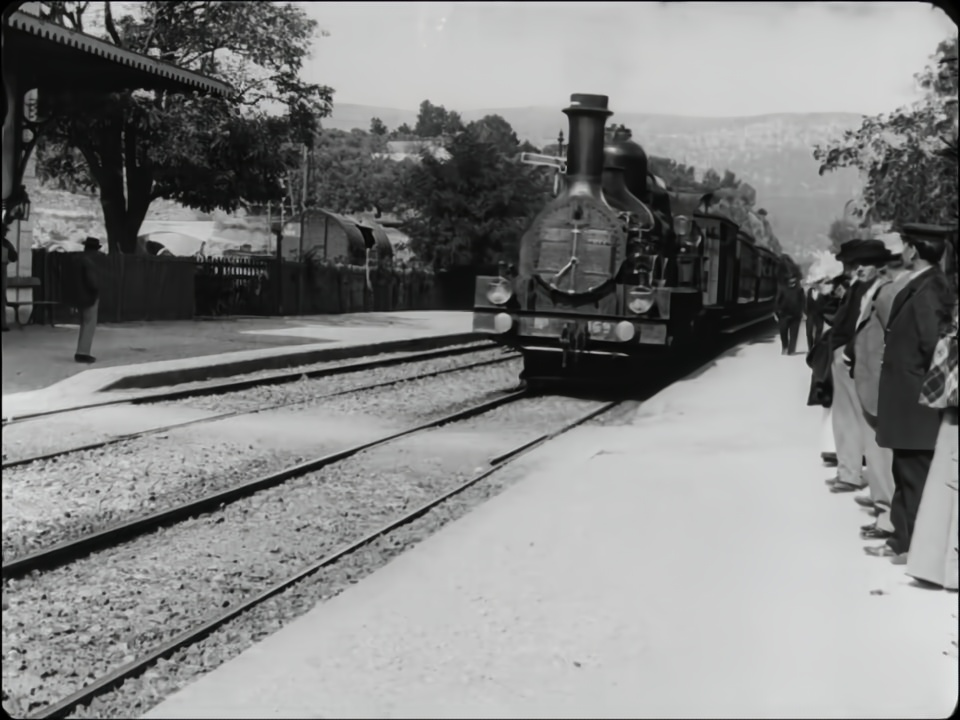

In [0]:
# check a random output frame
im = Image.open('/content/EDVR/codes/video/outframes/video/00200.jpg')
im

In [0]:
im.size

(960, 720)